# Can we use Sentiment Analysis to Predict Stock Prices?


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
!pip install yfinance -q
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# As we Scrape all the data with snscrape from twitter I commented this part
!pip install snscrape -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from tqdm import tqdm

## Example Pulling Microsoft Stock

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
msft_hist = msft.history(period="max")

In [ ]:
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060657,0.063907,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062823,0.064448,0.062823,0.063907,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0


In [ ]:
msft_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9355 entries, 1986-03-13 00:00:00-05:00 to 2023-04-25 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9355 non-null   float64
 1   High          9355 non-null   float64
 2   Low           9355 non-null   float64
 3   Close         9355 non-null   float64
 4   Volume        9355 non-null   int64  
 5   Dividends     9355 non-null   float64
 6   Stock Splits  9355 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 584.7 KB


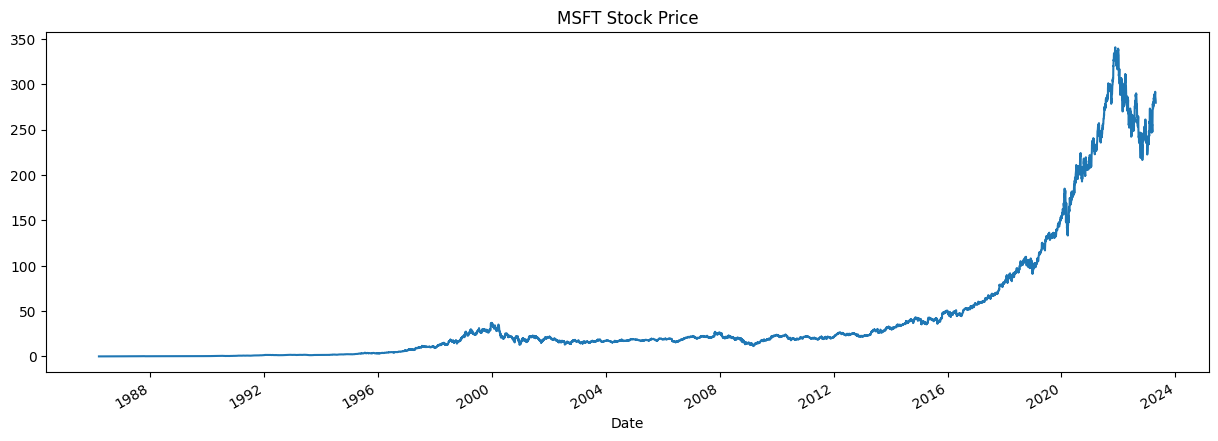

In [ ]:
msft_hist["Open"].plot(figsize=(15, 5), title="MSFT Stock Price")
plt.show()

In [ ]:
stocks = [
    "NVDA",
    "PINS",
    "TSLA",
    "SHOP",
    "O",
    "NKE",
    "GOOG",
    "META",
    "MSFT",
    "AMZN",
    "ZM",
    "PFE",
    "MRNA",
    "SPOT",
    "TMUS",
]

In [ ]:
hists = {}
for s in stocks:
    tkr = yf.Ticker(s)
    history = tkr.history(period="3y")
    hists[s] = history

In [ ]:
len(hists)

15

# Plot the Stock Price

In [ ]:
for stock in stocks:
    temp_df = hists[stock].copy()

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=temp_df.index,
                open=temp_df["Open"],
                high=temp_df["High"],
                low=temp_df["Low"],
                close=temp_df["Close"],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=300,
        paper_bgcolor="LightSteelBlue",
        title=stock,
    )

    fig.show()

# Pull Tweets about each Stock

In [ ]:
hists["NVDA"].index.min()

Timestamp('2020-04-27 00:00:00-0400', tz='America/New_York')

In [ ]:
stock = "NVDA"

In [ ]:
# Source code for scrape the tweets

# # importing libraries and packages
# import snscrape.modules.twitter as sntwitter
# from tqdm.notebook import tqdm

# # Creating list to append tweet data
# tweets_list = []
# # Using TwitterSearchScraper to scrape data and append tweets to list
# for i, tweet in tqdm(
#     enumerate(
#         sntwitter.TwitterSearchScraper(
#             f"${stock} since:2020-02-04 until:2023-05-02"
#         ).get_items()
#     ),
#     total=100_000,
# ):  # declare a username
#     if i > 100_000:  # number of tweets you want to scrape
#         break
#     tweets_list.append(
#         [tweet.date, tweet.id, tweet.content, tweet.user.username]
#     )  # declare the attributes to be returned
# # Creating a dataframe from the tweets list above
# tweet_df = pd.DataFrame(
#     tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
# )

In [ ]:
tweet_df=pd.read_csv("/kaggle/input/100k-nvidia-tweets/Nvidia-Tweets.csv")

In [ ]:
tweet_df

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-02-06 10:07:17+00:00,1.622537e+18,$nvda Top analyst price target for next week ...,RyderJohnston6
1,1,2023-02-06 10:06:30+00:00,1.622537e+18,$nvda Top analyst price target for this week.🔗...,k_mebane
2,2,2023-02-06 10:06:08+00:00,1.622537e+18,$nvda Top analyst price target for next week.....,RonaldBevan2
3,3,2023-02-06 10:05:43+00:00,1.622537e+18,$NVDA Top analyst target price for next week🚀 ...,Eva077777
4,4,2023-02-06 10:03:49+00:00,1.622537e+18,$rsls rebound 🚨🚨🚀🚀🚀\n————\n\n$EDSA\n$KODK\n$DO...,MrBlackTrading
...,...,...,...,...,...
100842,99996,2022-11-21 14:32:00+00:00,1.594700e+18,Real-time trading alerts from our team of seas...,Vinesh00518
100843,99997,2022-11-21 14:32:00+00:00,1.594700e+18,50k+ members\nDo join=&gt;https://t.co/4zYWlhg...,bishnuvardhan
100844,99998,2022-11-21 14:32:00+00:00,1.594700e+18,Couple of stats and quotes for the week ahead....,RAJURAY98
100845,99999,2022-11-21 14:30:28+00:00,1.594700e+18,$NVDA Critical level $150! https://t.co/AdQoNa...,jakethestockguy


In [ ]:
tweet_df.isnull().sum()

Unnamed: 0       0
Datetime       478
Tweet Id       846
Text           846
Username      1214
dtype: int64

In [ ]:
tweet_df.dropna(inplace=True)

In [ ]:
tweet_df.shape

(99633, 5)

In [ ]:
# tweet_df.to_csv('Nvidia-Tweets.csv')

In [ ]:
# tweet_df.to_parquet("Nvidia_tweets.parquet")

## Sentiment Analysis Prep

In [ ]:
from transformers import pipeline

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task("I love to code in python and it's amazing to use huggingface for sentiment analysis")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.9827125072479248}]

In [ ]:
sent_results = {}
count = 0
for i, d in tqdm(tweet_df.iterrows(), total=len(tweet_df)):
    sent = sentiment_task(d["Text"])
    sent_results[d["Tweet Id"]] = sent
    count += 1
    if count == 60000:
        break

 60%|██████    | 59999/99633 [3:03:34<2:01:15,  5.45it/s]


In [ ]:
sent_results

{1.62253740706014e+18: [{'label': 'positive', 'score': 0.6267974972724915}],
 1.6225372078474527e+18: [{'label': 'positive', 'score': 0.870906412601471}],
 1.6225371169988608e+18: [{'label': 'positive', 'score': 0.6359899044036865}],
 1.622537012158042e+18: [{'label': 'positive', 'score': 0.8311952948570251}],
 1.6225365326565908e+18: [{'label': 'positive', 'score': 0.8050740361213684}],
 1.622535627408552e+18: [{'label': 'positive', 'score': 0.8929924964904785}],
 1.622535020060545e+18: [{'label': 'positive', 'score': 0.7525844573974609}],
 1.6225344991407882e+18: [{'label': 'positive', 'score': 0.6623911261558533}],
 1.6225344084641382e+18: [{'label': 'neutral', 'score': 0.8421579599380493}],
 1.6225327903729377e+18: [{'label': 'neutral', 'score': 0.5409596562385559}],
 1.622532481948975e+18: [{'label': 'positive', 'score': 0.5875910520553589}],
 1.622529448829395e+18: [{'label': 'neutral', 'score': 0.791542112827301}],
 1.622529447696941e+18: [{'label': 'neutral', 'score': 0.8166654

In [ ]:
sent_df = pd.DataFrame(sent_results).T
sent_df["label"] = sent_df[0].apply(lambda x: x["label"])
sent_df["score"] = sent_df[0].apply(lambda x: x["score"])
sent_df = sent_df.merge(
    tweet_df.set_index("Tweet Id"), left_index=True, right_index=True
)

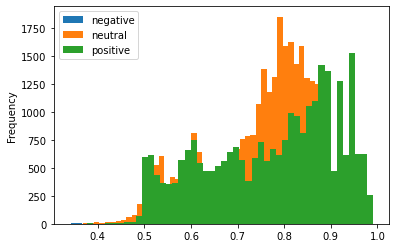

In [ ]:
sent_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

In [ ]:
sent_df.sample(10)

,0,label,score,Unnamed: 0,Datetime,Text,Username
1.608739e+18,"{'label': 'neutral', 'score': 0.7845673561096191}",neutral,0.784567,49504,2022-12-30 08:16:04+00:00,“Invest in what you consume” - Sha Osman\nhttp...,MURALIE622
1.620289e+18,"{'label': 'neutral', 'score': 0.7530890703201294}",neutral,0.753089,8549,2023-01-31 05:11:14+00:00,To share trading point of view join here \nhtt...,nappedonthebed
1.617598e+18,"{'label': 'neutral', 'score': 0.8339568972587585}",neutral,0.833957,19567,2023-01-23 19:01:22+00:00,$NVDA ALL THESE LEVELS POSTED AHEAD OF TIME B...,Shirley88018720
1.610538e+18,"{'label': 'neutral', 'score': 0.6112448573112488}",neutral,0.611245,43552,2023-01-04 07:26:41+00:00,$NVDA *ALL THESE LEVELS POSTED AHEAD OF TIME ...,Peter29719886
1.617376e+18,"{'label': 'positive', 'score': 0.6782160997390...",positive,0.678216,21008,2023-01-23 04:18:22+00:00,$NVDA ALL THESE LEVELS POSTED AHEAD OF TIME ...,EricaTe85892054
1.612455e+18,"{'label': 'neutral', 'score': 0.5562033653259277}",neutral,0.556203,37506,2023-01-09 14:25:10+00:00,"Bank earnings just ahead, more Fed &amp; Powel...",JJSpeculation
1.613605e+18,"{'label': 'neutral', 'score': 0.7134252190589905}",neutral,0.713425,32754,2023-01-12 18:34:14+00:00,$TSLA -2.6%🔴\n$AAPL -0.4%🔴\n$NVDA ...,XoloWall
1.616575e+18,"{'label': 'positive', 'score': 0.6012670397758...",positive,0.601267,22741,2023-01-20 23:15:33+00:00,"Hey CBW, what are you thinking with $NVDA at t...",thereal_elAndy
1.620466e+18,"{'label': 'negative', 'score': 0.5594009160995...",negative,0.559401,7788,2023-01-31 16:54:56+00:00,Where is the guy that was tracking the hell ou...,HarleyMCarroll
1.617643e+18,"{'label': 'neutral', 'score': 0.8080824017524719}",neutral,0.808082,19088,2023-01-23 22:00:32+00:00,Today's Most Active Calls... \n\n$TSLA $AAPL $...,thuhkang


In [ ]:
sent_df.loc[sent_df["label"] == "Negative", "score_"] = (sent_df.loc[sent_df["label"] == "Negative"]["score"] * -1)

sent_df.loc[sent_df["label"] == "Neutral", "score_"] = 0

<AxesSubplot:ylabel='Frequency'>

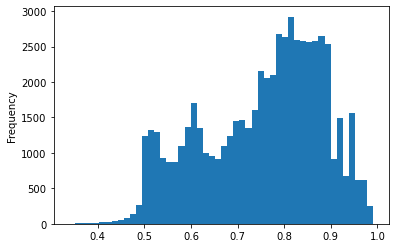

In [ ]:
sent_df["score_"].plot(kind="hist", bins=50)

In [ ]:
sent_df

In [ ]:
sent_df['Datetime']= pd.to_datetime(sent_df['Datetime'])

In [ ]:
sent_df["Date"] = sent_df["Datetime"].dt.date

In [ ]:
sent_df["Date"]

1.622537e+18    2023-02-06
1.622537e+18    2023-02-06
1.622537e+18    2023-02-06
1.622537e+18    2023-02-06
1.622537e+18    2023-02-06
                   ...    
1.606012e+18    2022-12-22
1.606012e+18    2022-12-22
1.606012e+18    2022-12-22
1.606012e+18    2022-12-22
1.606012e+18    2022-12-22
Name: Date, Length: 60000, dtype: object

In [ ]:
sent_daily = sent_df.groupby("Date")["score_"].mean()
sent_daily

In [ ]:
Nvidia_df = hists["NVDA"].copy()
Nvidia_df = Nvidia_df.reset_index()
Nvidia_df["Date"] = Nvidia_df["Date"].dt.date
Nvidia_df = Nvidia_df.set_index("Date")
Nvidia_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-04,67.357196,71.019214,66.609337,70.924484,59740800,0.0,0.0
2020-03-05,68.927694,70.597916,67.681262,68.127487,54032800,0.0,0.0
2020-03-06,66.330126,66.905985,64.315895,66.320160,51541200,0.0,0.0
2020-03-09,59.803811,64.664897,59.375038,61.184860,61416000,0.0,0.0
2020-03-10,63.951940,65.083694,61.321967,65.083694,58064800,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-27,236.699997,238.800003,234.539993,235.009995,45299400,0.0,0.0
2023-02-28,233.720001,238.250000,232.059998,232.160004,45596300,0.0,0.0
2023-03-01,231.919998,232.559998,225.080002,226.979996,46002600,0.0,0.0


In [ ]:
sent_and_stock = sent_daily.to_frame("sentiment").merge(Nvidia_df, left_index=True, right_index=True)
sent_and_stock

,sentiment,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-12-22,0.754180,160.940002,161.380005,148.820007,153.389999,56504500,0.0,0.0
2022-12-23,0.737270,151.960007,153.389999,148.830002,152.059998,34932600,0.0,0.0
2022-12-27,0.748421,150.740005,151.000000,140.559998,141.210007,46490200,0.0,0.0
2022-12-28,0.742725,139.270004,142.619995,138.839996,140.360001,35106600,0.0,0.0
2022-12-29,0.754587,144.020004,146.830002,142.270004,146.029999,35492300,0.0,0.0
2022-12-30,0.746990,143.339996,146.289993,142.330002,146.139999,31049000,0.0,0.0
2023-01-03,0.751009,148.509995,149.960007,140.960007,143.149994,40127700,0.0,0.0
2023-01-04,0.753280,145.669998,148.529999,142.410004,147.490005,43132400,0.0,0.0
2023-01-05,0.742794,144.910004,145.639999,141.479996,142.649994,38916800,0.0,0.0


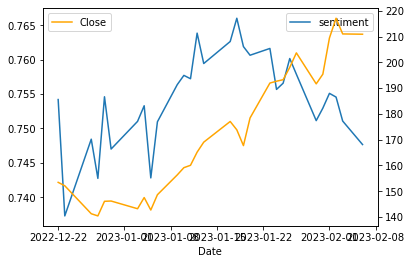

In [ ]:
ax = sent_and_stock["sentiment"].plot(legend="Sentiment")
ax2 = ax.twinx()
sent_and_stock["Close"].plot(ax=ax2, color="orange", legend="Closing Price")
plt.show()

In [ ]:
hists["NVDA"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-04 00:00:00-05:00,67.357196,71.019214,66.609337,70.924484,59740800,0.0,0.0
2020-03-05 00:00:00-05:00,68.927694,70.597916,67.681262,68.127487,54032800,0.0,0.0
2020-03-06 00:00:00-05:00,66.330126,66.905985,64.315895,66.320160,51541200,0.0,0.0
2020-03-09 00:00:00-04:00,59.803811,64.664897,59.375038,61.184860,61416000,0.0,0.0
2020-03-10 00:00:00-04:00,63.951940,65.083694,61.321967,65.083694,58064800,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-27 00:00:00-05:00,236.699997,238.800003,234.539993,235.009995,45299400,0.0,0.0
2023-02-28 00:00:00-05:00,233.720001,238.250000,232.059998,232.160004,45596300,0.0,0.0
2023-03-01 00:00:00-05:00,231.919998,232.559998,225.080002,226.979996,46002600,0.0,0.0


<AxesSubplot:xlabel='Date'>

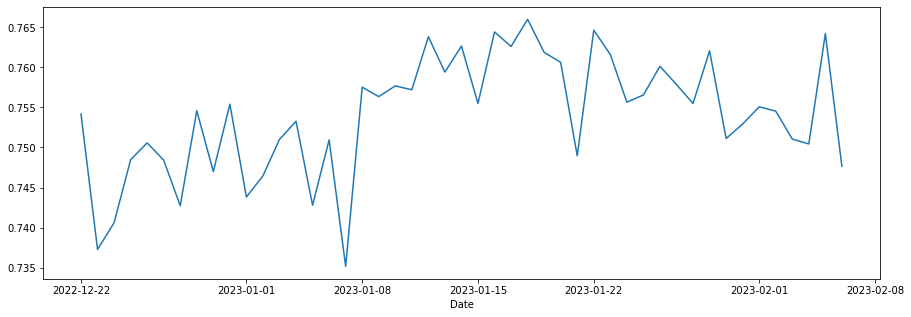

In [ ]:
sent_df.groupby("Date")["score_"].mean().plot(figsize=(15,5))
